In [1]:
# Import we will use tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Import the data with pandas
soccer = pd.read_csv("FullData2.csv", sep=",")

In [8]:
soccer.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [18]:
soccer.dtypes

Name                   object
Nationality            object
National_Position      object
National_Kit          float64
Club                   object
Club_Position          object
Club_Kit              float64
Club_Joining           object
Contract_Expiry       float64
Rating                  int64
Height                 object
Weight                 object
Preffered_Foot         object
Birth_Date             object
Age                     int64
Preffered_Position     object
Work_Rate              object
Weak_foot               int64
Skill_Moves             int64
Ball_Control            int64
Dribbling               int64
Marking                 int64
Sliding_Tackle          int64
Standing_Tackle         int64
Aggression              int64
Reactions               int64
Attacking_Position      int64
Interceptions           int64
Vision                  int64
Composure               int64
Crossing                int64
Short_Pass              int64
Long_Pass               int64
Accelerati

In [42]:
soccer.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


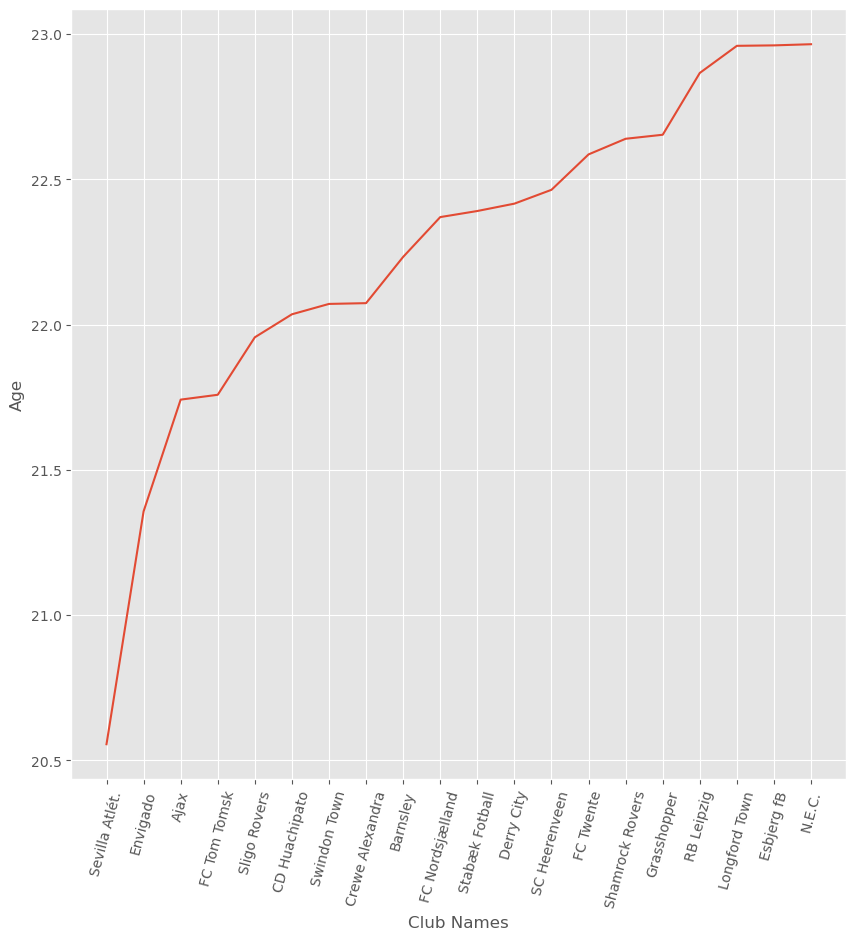

In [291]:
# Visualization teams with the youngest average age of players
age_sorted = soccer.groupby(["Club"]).mean()["Age"].sort_values().head(20)
plt.figure(figsize=(10,10))
plt.plot(age_sorted.index, age_sorted.values)
plt.style.use("ggplot")
plt.xlabel("Club Names")
plt.ylabel("Age")
plt.xticks(rotation = 75);

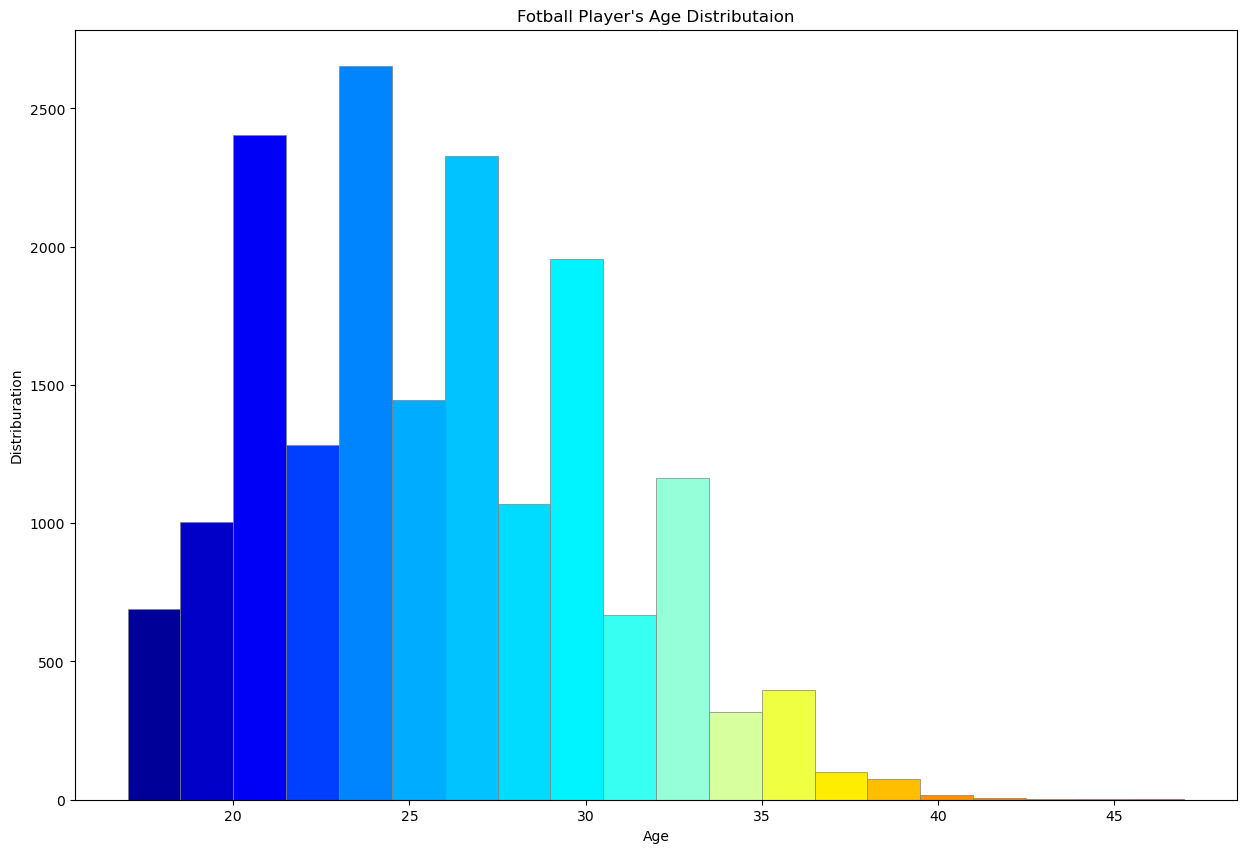

In [266]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

ages = soccer["Age"]
# Draw the histogram
fig, ax = plt.subplots(figsize=(15,10))
counts, bins, patches = ax.hist(ages, bins=20, edgecolor='gray', linewidth=0.5)

# Gradient colours pool
colors = ['#000099', '#0000ff', '#0099ff', '#00ccff', '#00ffff', '#ccffcc', '#ffff00', '#ff9900', '#ff6600', '#ff0000']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)

# Set the gradient colours for each bar
bin_centers = 0.5 * (bins[:-1] + bins[1:])
colormap = cmap((bin_centers - min(bin_centers)) / (max(bin_centers) - min(bin_centers)))
for c, p in zip(colormap, patches):
    plt.setp(p, 'facecolor', c)

# Set title and axis
ax.set_title("Fotball Player's Age Distributaion")
ax.set_xlabel('Age')
ax.set_ylabel('Distriburation')


plt.show()


In [159]:
# Teams Which has the oldest average of players

grouped_df = soccer.groupby('Club')['Age'].mean().nlargest(20)
grouped_df


Club
Free agent            39.000000
A. Minas G.           30.200000
Atl. Paranaense       30.000000
Criciúma              30.000000
Sport                 30.000000
Vitória               30.000000
Chievo Verona         29.961538
Goiás                 29.800000
Chapecoense           29.600000
Santa Cruz            29.600000
Joinville             29.400000
Ponte Preta           29.400000
Chiapas               29.233333
Avaí                  29.200000
Figueirense           29.200000
Medipol Başakşehir    28.923077
Internacional         28.800000
Palmeiras             28.800000
FC Orenburg           28.714286
Cruzeiro              28.600000
Name: Age, dtype: float64

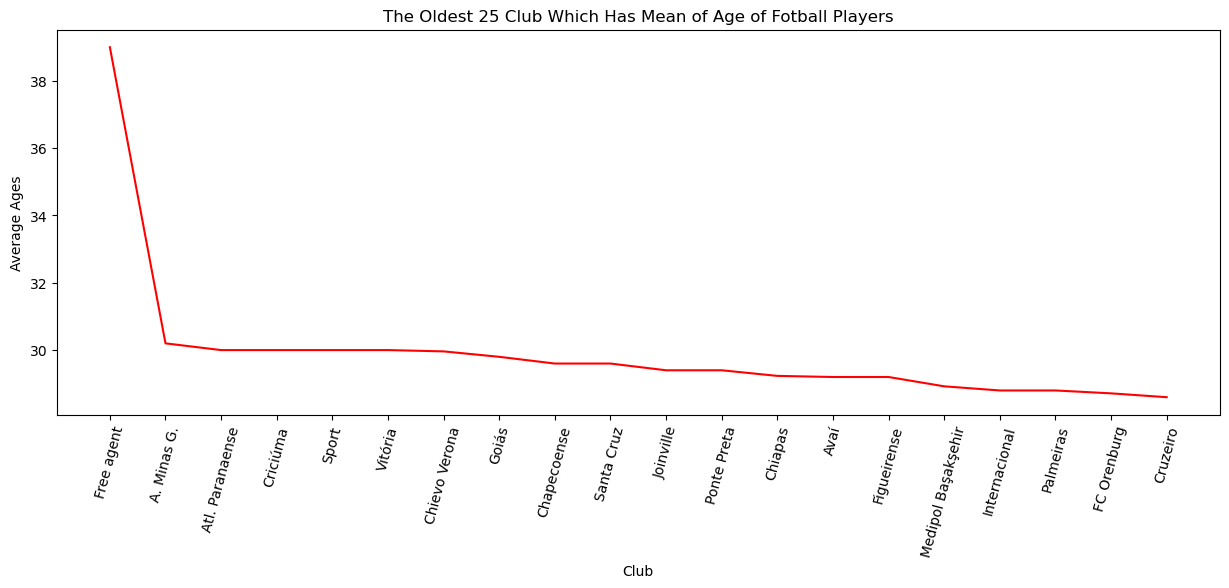

Club
Free agent            39.000000
A. Minas G.           30.200000
Atl. Paranaense       30.000000
Criciúma              30.000000
Sport                 30.000000
Vitória               30.000000
Chievo Verona         29.961538
Goiás                 29.800000
Chapecoense           29.600000
Santa Cruz            29.600000
Joinville             29.400000
Ponte Preta           29.400000
Chiapas               29.233333
Avaí                  29.200000
Figueirense           29.200000
Medipol Başakşehir    28.923077
Internacional         28.800000
Palmeiras             28.800000
FC Orenburg           28.714286
Cruzeiro              28.600000
Name: Age, dtype: float64

In [176]:
# Visualization Teams which has the oldest average of players

plt.figure(figsize=(15, 5))
plt.plot(grouped_df.index, grouped_df.values, c="Red")
plt.title('The Oldest 25 Club Which Has Mean of Age of Fotball Players')
plt.xlabel('Club')
plt.ylabel('Average Ages')
plt.xticks(rotation = 75)
plt.show()
grouped_df

In [123]:
# Nationality which has the oldest average of players

Nationality_ages =soccer.groupby('Nationality').mean().reset_index()
Nationality_ages

,Nationality,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,avg_age
0,Afghanistan,NaN,20.500000,2021.000000,54.500000,19.500000,2.500000,2.500000,56.500000,54.500000,...,47.500000,36.000000,52.000000,45.500000,7.000000,12.500000,9.500000,14.000000,6.000000,NaN
1,Albania,NaN,19.297297,2018.783784,65.864865,24.297297,2.891892,2.324324,60.432432,56.594595,...,46.540541,44.000000,50.486486,46.270270,14.513514,14.972973,14.540541,14.729730,15.891892,NaN
2,Algeria,NaN,20.280000,2018.600000,71.620000,26.840000,3.140000,2.720000,69.100000,66.800000,...,59.420000,57.080000,58.080000,54.360000,13.280000,13.500000,12.920000,12.240000,13.640000,NaN
3,Angola,NaN,18.363636,2018.727273,70.000000,26.272727,3.000000,2.909091,67.090909,67.909091,...,55.363636,48.909091,56.454545,57.454545,11.181818,11.818182,9.909091,10.545455,10.272727,NaN
4,Antigua & Barbuda,NaN,17.500000,2018.250000,62.500000,26.500000,2.500000,2.750000,58.250000,59.500000,...,53.500000,47.250000,51.250000,46.500000,12.250000,10.000000,10.500000,12.750000,9.250000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Uzbekistan,NaN,22.000000,2021.000000,68.000000,29.000000,3.333333,2.000000,62.000000,49.666667,...,62.333333,59.000000,41.666667,45.666667,9.666667,12.333333,9.333333,11.333333,10.000000,NaN
156,Venezuela,12.363636,26.071429,2019.309524,69.166667,24.714286,3.047619,2.357143,61.666667,58.023810,...,48.547619,43.833333,51.857143,45.142857,14.785714,13.880952,14.119048,14.071429,14.333333,NaN
157,Wales,12.000000,19.540984,2018.450820,64.245902,25.081967,2.893443,2.245902,57.418033,53.491803,...,45.639344,41.147541,49.204918,40.344262,14.065574,14.614754,14.581967,14.385246,14.114754,NaN
158,Zambia,NaN,13.250000,2018.750000,69.500000,25.500000,3.250000,3.000000,66.500000,63.500000,...,50.750000,48.500000,59.250000,49.500000,12.000000,12.250000,10.500000,12.750000,10.500000,NaN


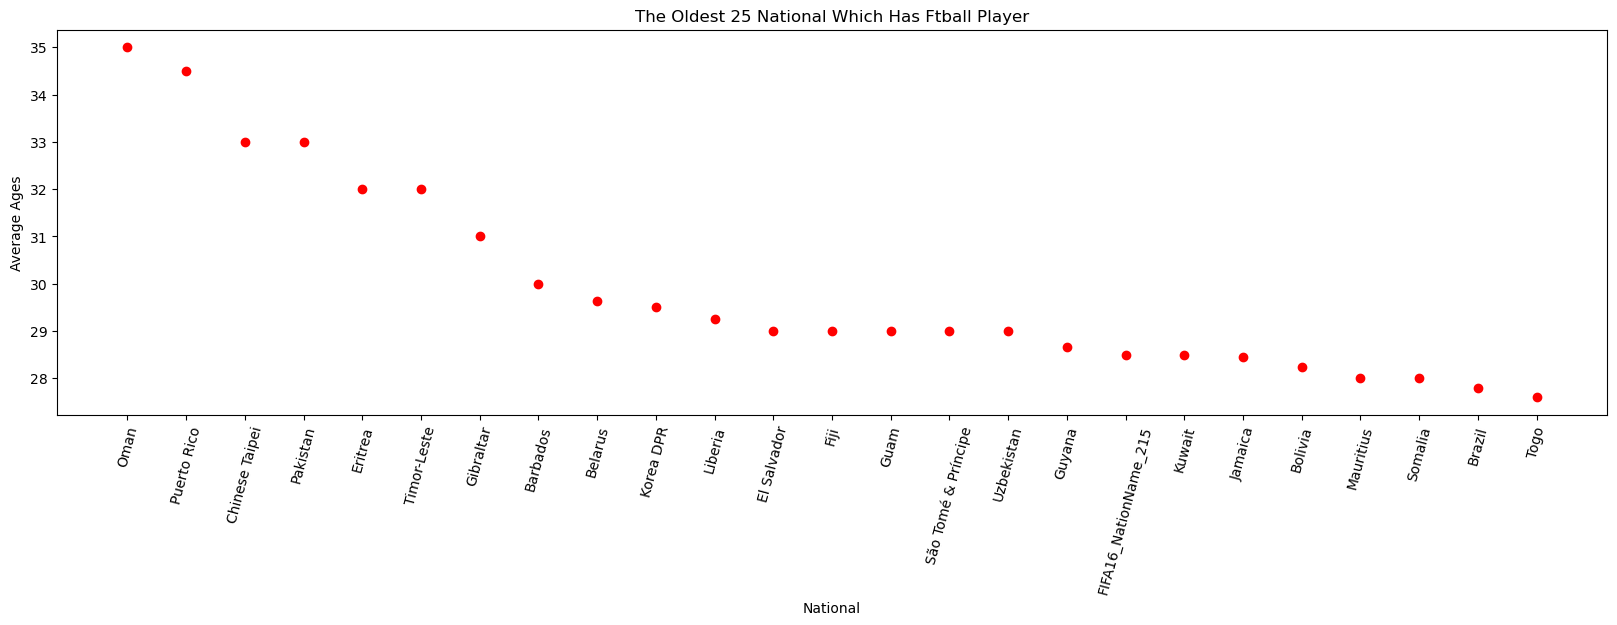

In [125]:
# Visualization the nationality which has the oldest average of players
national_ages = soccer.groupby('Nationality')['Age'].mean().nlargest(25)
national_ages
plt.figure(figsize=(20, 5))
plt.scatter(national_ages.index, national_ages.values, c="Red")
plt.title('The Oldest 25 National Which Has Ftball Player')
plt.xlabel('National')
plt.ylabel('Average Ages')
plt.xticks(rotation = 75)
plt.show()

In [156]:
# Players which has the highest average rating
top_players = soccer.nlargest(10, 'Rating')
top_players


,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,avg_age
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,81,76,85,88,14,7,15,11,11,NaN
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,89,90,74,85,14,6,15,11,8,NaN
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,79,84,81,83,15,9,15,9,11,NaN
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,84,85,88,33,27,31,25,37,NaN
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,14,11,47,11,91,89,95,90,89,NaN
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,21,19,40,13,86,88,87,85,90,NaN
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,77,76,81,86,8,15,12,6,10,NaN
7,Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,09/02/2013,2022.0,90,...,86,85,76,76,5,15,11,15,6,NaN
8,Zlatan Ibrahimović,Sweden,NaN,NaN,Manchester Utd,ST,9.0,07/01/2016,2017.0,90,...,82,82,91,93,9,13,10,15,12,NaN
9,Thibaut Courtois,Belgium,GK,1.0,Chelsea,GK,13.0,07/26/2011,2019.0,89,...,19,11,27,12,86,84,69,91,89,NaN


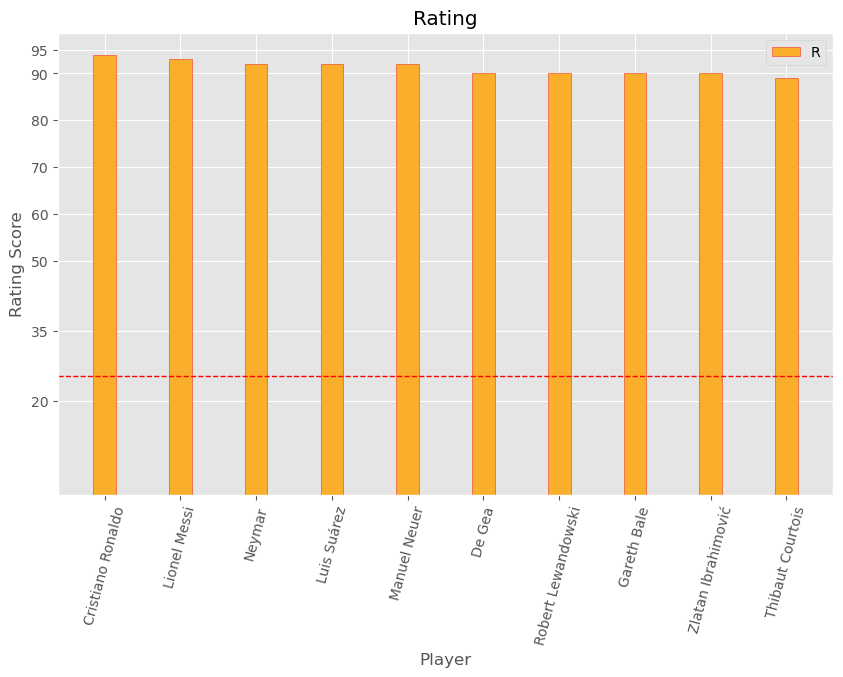

In [297]:
# Visualization players which has the highest average rating and average of all rating
top_players = soccer.nlargest(10, 'Rating')

top_players = top_players[['Rating', 'Club','Name']]
top_players
plt.figure(figsize=(10,6))
plt.bar(top_players['Name'], top_players['Rating'], width=0.3, color="#f9af2b", edgecolor="#f05131")
y = [20,35,50, 60, 70, 80, 90, 95]

# Set the axes and title
plt.xticks(rotation = 75)
plt.yticks(y)
plt.ylabel("Rating Score")
plt.xlabel("Player")
plt.legend("Rating")
plt.title("Rating")
plt.axhline(soccer["Age"].mean(), color='red', linestyle='--', linewidth=1)


plt.show()

In [155]:
top_players

,Rating,Club,Name
0,94,Real Madrid,Cristiano Ronaldo
1,93,FC Barcelona,Lionel Messi
2,92,FC Barcelona,Neymar
3,92,FC Barcelona,Luis Suárez
4,92,FC Bayern,Manuel Neuer
5,90,Manchester Utd,De Gea
6,90,FC Bayern,Robert Lewandowski
7,90,Real Madrid,Gareth Bale
8,90,Manchester Utd,Zlatan Ibrahimović
9,89,Chelsea,Thibaut Courtois


In [243]:
# Countries which has the most number of players
national_count = soccer.groupby("Nationality").count()["Name"].nlargest(30)
national_count


Nationality
England                1618
Argentina              1097
Spain                  1008
France                  974
Brazil                  921
Italy                   751
Germany                 689
Colombia                592
Japan                   471
Republic of Ireland     442
Netherlands             426
Chile                   398
Sweden                  378
Portugal                360
Saudi Arabia            354
Denmark                 342
Norway                  342
Mexico                  341
United States           332
Poland                  328
Korea Republic          321
Russia                  309
Scotland                292
Turkey                  292
Austria                 266
Belgium                 265
Australia               234
Switzerland             210
Uruguay                 153
Serbia                  136
Name: Name, dtype: int64

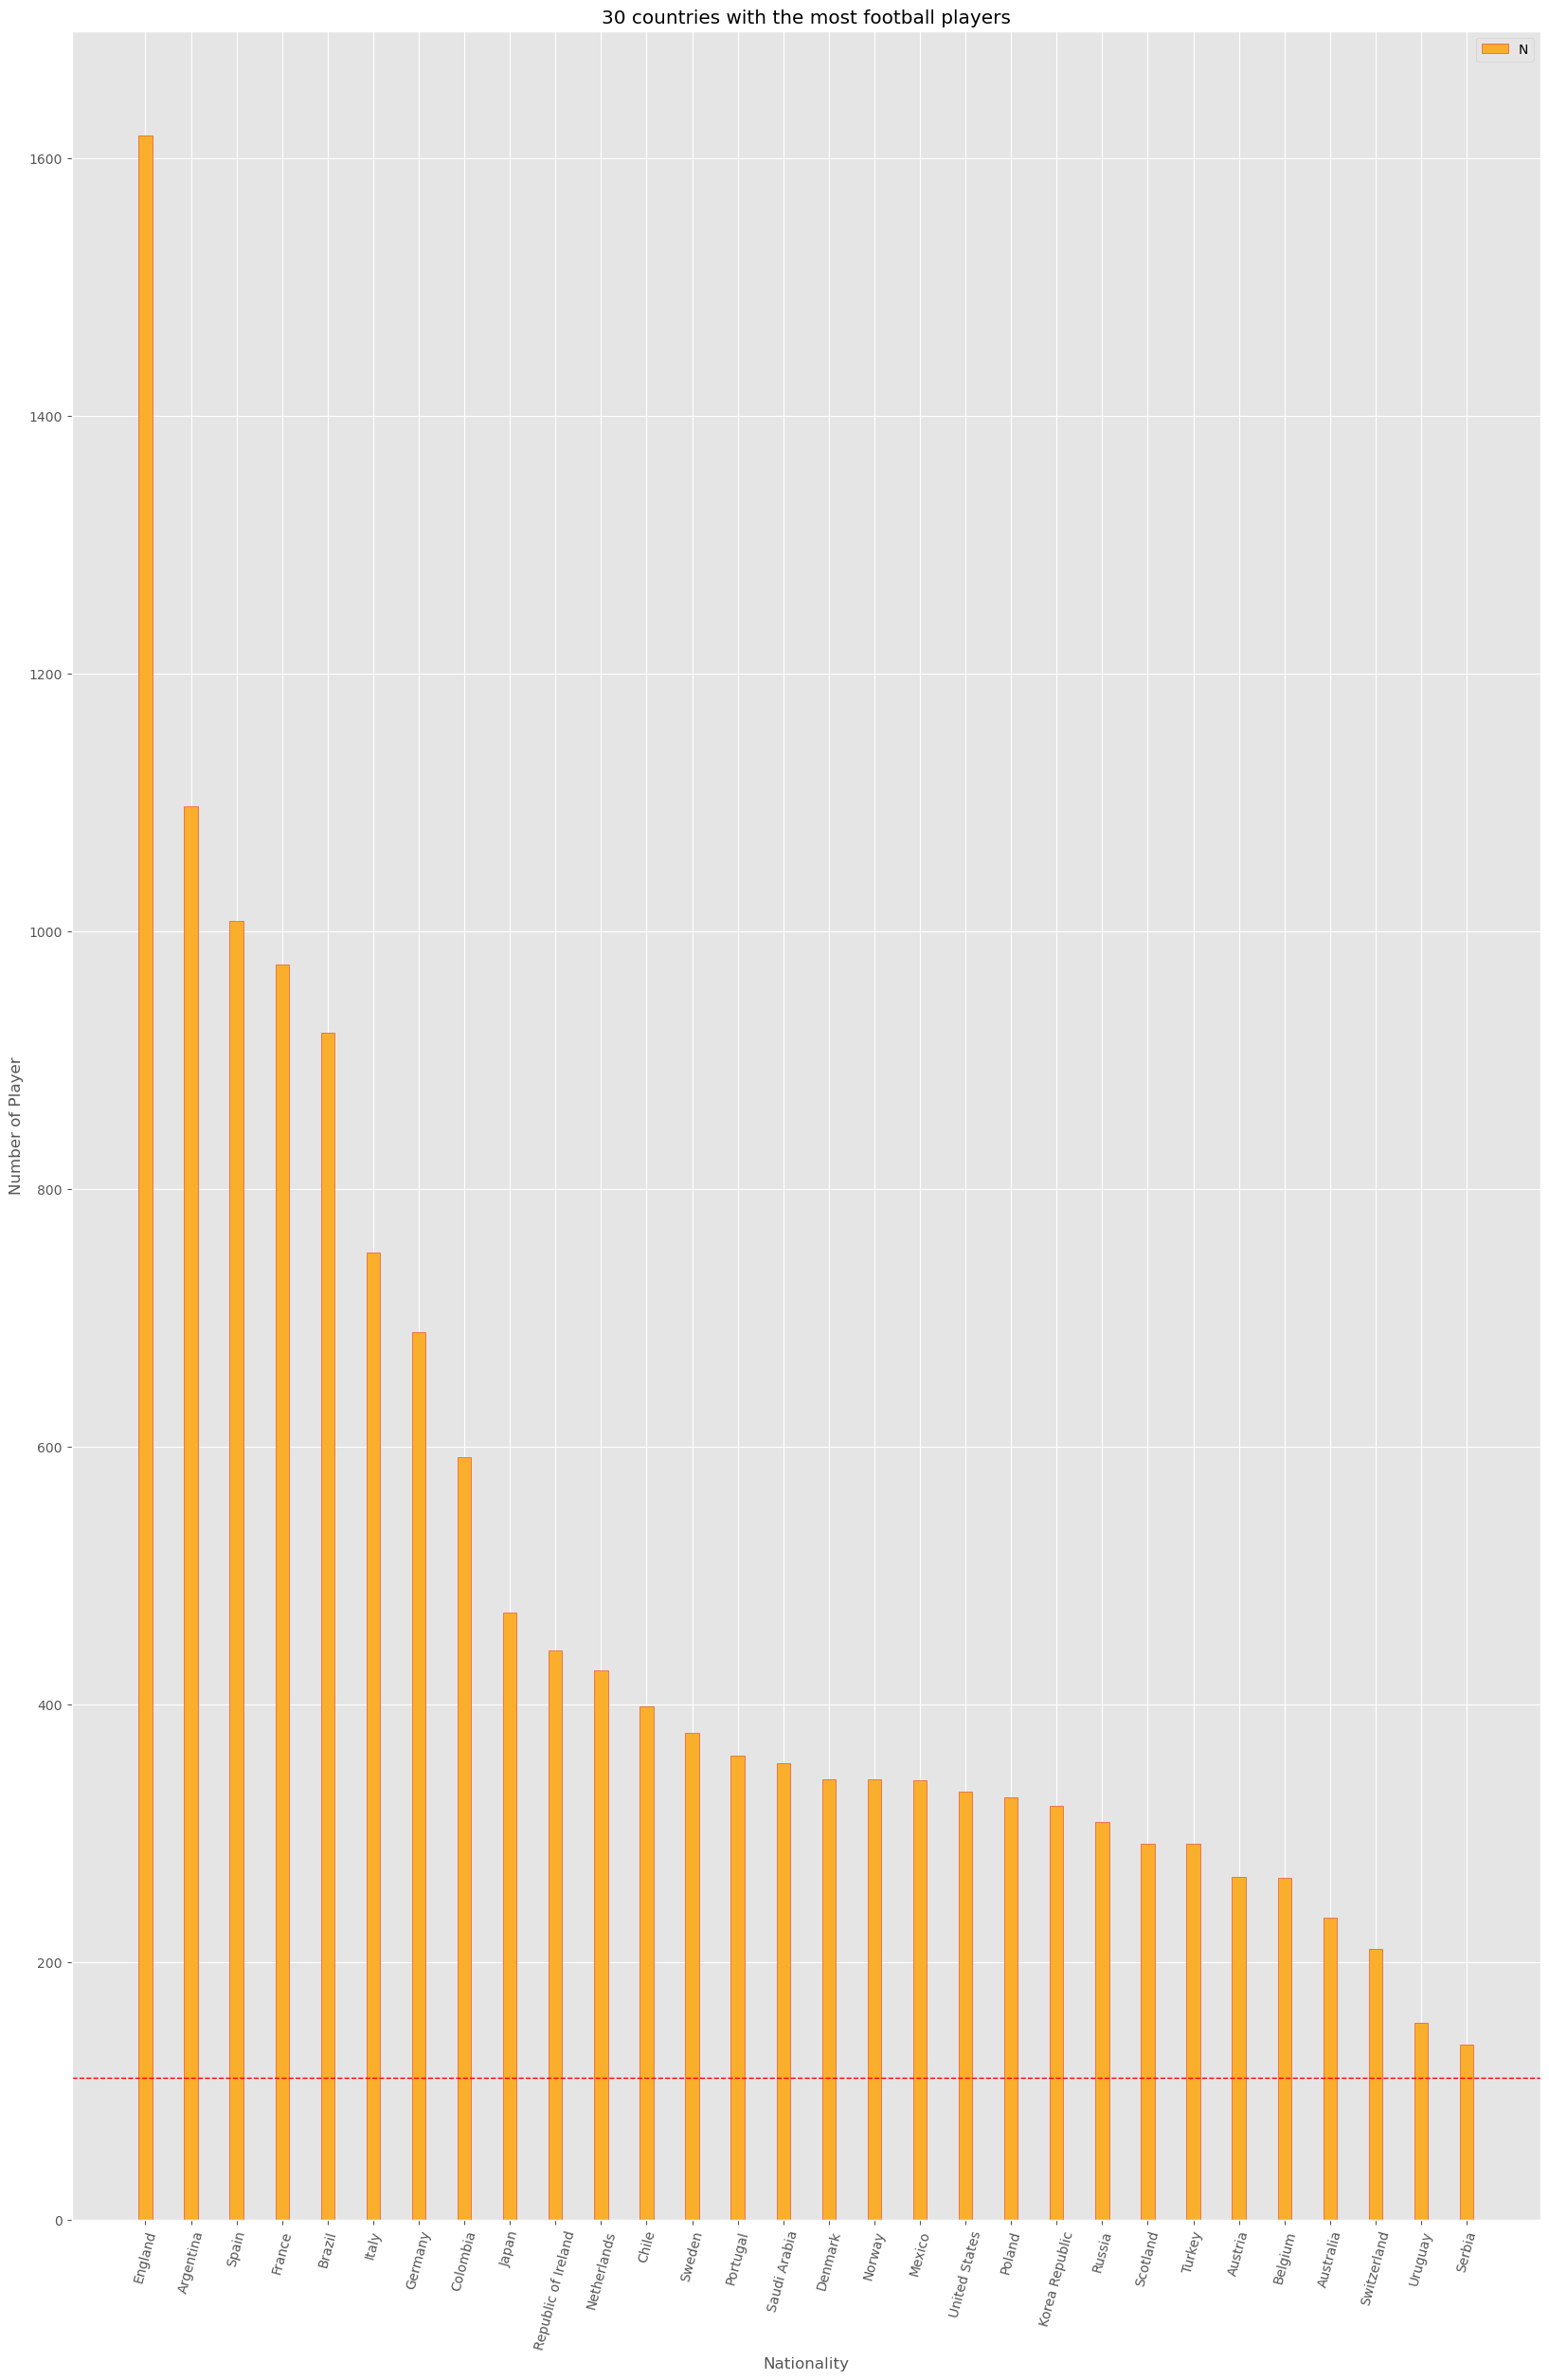

In [298]:
# Visualization countries which has the most number of players and average
plt.figure(figsize=(20,30))
plt.bar(national_count.index,national_count.values, width=0.3, color="#f9af2b", edgecolor="#f05131")

plt.xticks(rotation = 75)
plt.ylabel("Number of Player")
plt.xlabel("Nationality")
plt.legend("Number")
plt.title("30 countries with the most football players")
plt.axhline(soccer.groupby("Nationality").count()["Name"].mean(), color='red', linestyle='--', linewidth=1)
plt.show()
